# Fraud Detection and Likelihood of Success Project

## Main Goals:
I want to be able to identify suspicious or fraudulent projects happening within economic development projects administered by the ESD based on historical data.  This identification will come from data where funding is disproportionate to project scope or industry, high job creation claims but low actual job creation, and large discrepancies between expected and actual disbursements.

The second goal I have for this project is to create a model that will help the ESD determine which projects to fund.

## Data Exploration
Exploring the data to see what variables I can work with

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('DOEI_Fraud_data.csv')
df.head(2)

/var/folders/5m/n3lmdh1d5bl0t6d_1p3n_2wh0000gn/T/ipykernel_47555/1063969295.py:1: DtypeWarning: Columns (0,11,12,14,23,24,27,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('DOEI_Fraud_data.csv')


,EIN of the recipient,Lead Agency Name,Lead Agency Code,Quarter Number of the Submission,Project ID Number,Program through which the funding was awarded,Recipient Name,Name of project,Is the Award to a Public or Private Sector Entity?,Project Description,...,Project Hires (PTs),NYS MWBE Utilization Goal Applied,Current MWBE Utilization Rate,Is this a legacy project,Original Assistance Amount,Original Jobs Created (FTE),Original Jobs Retained (FTE),Original Total Public-Private Investment,Original Recipient,Contact
0,16-09119851,ESD,291910,Q3 of SFY 2024-2025,"123,581",Excelsior Jobs Program,Aakron Rule Corporation/ Wagner Pencil Company,Aakron Rule Excelsior,Private,"Tax Credit, Manufacturing, Western New York, A...",...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,database@esd.ny.gov
1,14-1811177,ESD,291910,Q3 of SFY 2024-2025,"123,585",Regional Council Capital Fund,Schenectady Metroplex Development Authority,Robinson Block Capital,Public,"Grant, Public Administration, Capital District...",...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,database@esd.ny.gov


In [4]:
#Dropping unnecessary variables
df_cleaned = df.drop(df.columns[0:5], axis = 1)
df_cleaned = df_cleaned.drop(['Project Description', 'Contact', 'Name of project', 'Assistance Amount',
                              'Penalties Applied?', 'Rationale for Termination', 
                             'Reason for Non-Compliant Status', 'Street Address',
                             'Postal Code', 'If "YES" what is the additional awarding agency name?',
                             'Total Employees at the site (PTs)', 
                             'Total Employees at the site (FTEs)',
                             'Total Employees at the site (project Hires in FTEs)',
                             'Other State Agency Funding Program',
                             'Is the Project also receiving benefits from a local Industrial Development Agency (IDA)?',
                             'If applicable, from which IDA is the project also receiving benefits?',
                             'Total Employees at the site (project Hires in PT workers only)',
                             'Original Assistance Amount', 'Original Assistance Amount',
                             'Original Jobs Created (FTE)', 'Original Jobs Retained (FTE)',
                             'Original Total Public-Private Investment', 'Original Recipient'], axis = 1)

#Renaming the column names
df_cleaned.columns = ["programFunded", "companyName", "pubOrPri", "industry", "govSponsored",
                     "county", "region", "startDate", "endDate", "assistType", "assistAmountAwarded",
                     "amountDisbursed", "otherInv", "otherInvAmount", "idaTaxBenefits", "totalNYCInv", 
                     "totalPubPriInv", "projectStatus", "tcCompliant", "isJobCreatRet", "FTjobCreatComm",
                     "PTjobCreatComm", "FTjobRetComm", "PTjobRetComm", "FTjobCreated", "PTjobCreated",
                     "FTjobRetained", "PTjobRetained", "FTprojectHire", "PTprojectHire", "MWBEGoal", 
                     "MWBEUtilized", "isLegacy"]


### Selected Variables
programFunded: Name of program or funding source that is funding the economic assistance from reporting agency.

companyName: Name of organization receiving economic assistance from reporting agency.

pubOrPri: "Public" entity being any governmental entity, including but not limited to IDAs, cities, towns, villages, or counties. "Private" entity being any entity that does not fall under the definition of “Public” entity, including but not limited to private businesses and non-profit organizations.

industry: Primary industry sector of the project, based upon the two-digit NAICS code for recipient.

govSponsored: a project that is specifically allocated or sponsored by a government representative, such as a legislator or assembly member

county: County for location of project.

region: Region for location of project (derived from the 10 New York State Economic Development Regions).

startDate: Start date of the contract ESD

endDate: Date that all financial assistance has been disbursed for the project

assistType: Type of assistance the project is receiving, defined as either loan, grant, or tax credit.

assistAmountAwarded: The total dollar value for the specific agency and project award. This does not include additional dollars awarded to the project from other state sources.

amountDisbursed: The total dollars disbursed to the project, subject to a reporting lag.

otherInv: Indicates whether the project is receiving benefits outside of the reporting agency, program and award amount. This field can include other investments from the reporting agency (Yes/No).

otherInvAmount: Dollar amount of funding from other agencies, if applicable.

idaTaxBenefits: Calculated as net exemptions provided minus any PILOT payments made over the life of the IDA exemption, if applicable

totalNYCInv: Total dollar amount of DOS and other known NYS agency investments ESD: Total dollar amount of the awarding agency and other known NYS agency investments.

totalPubPriInv: The entire cost of the project including any non-DOS funding. This field can include estimates for private investment for Downtown Revitalization Initiative projects.

projectStatus: The current status of the project, either Active, Closed or Terminated

tcCompliant: Indicates whether the project is currently considered by DOS to be in compliance, per the specific project requirements. Compliance is presented as Yes/No

isJobCreatRet: Whether or not the project has a job retention and/or job creation commitment.

FTjobCreatComm: Total number of new jobs (Full-time equivalent) that a project is committed to creating, when applicable. Projects that do not have direct job commitments will display "N/A" for this field.

PTjobCreatComm: Total number of new jobs (Part-time) that a project is ultimately committed to creating, when applicable. Projects that do not have direct job commitments will display "N/A" for this field. 

FTjobRetComm: Total number of new jobs (Full-time equivalent) that a project is committed to retaining, when applicable. Projects that do not have direct job commitments will display "N/A" for this field.

PTjobRetComm: Total number of new jobs (Part-time) that a project is committed to retaining, when applicable. Projects that do not have direct job commitments will display "N/A" for this field.

FTjobCreated: Total number of jobs (Full-time equivalent) that a project is currently documented as having created, when applicable. Note that many projects, such as community investments into public spaces, may not report jobs created even though they may contribute to economic development. Projects that do not have direct job commitments will display "N/A" for this field.

PTjobCreated: Total number of jobs (Part-time) that a project is currently documented as having created, when applicable. Note that many projects, such as community investments into public spaces, may not report jobs created even though they may contribute to economic development. Projects that do not have direct job commitments will display "N/A" for this field.

FTjobRetained: Total number of existing jobs (Full-time equivalent) that a project is currently documented as having retained, when applicable. “Jobs Retained To-Date” can be defined slightly differently by different programs. Projects that do not have direct job commitments will display "N/A" for this field.

PTjobRetained: Total number of existing jobs (Part-time) that a project is currently documented as having retained, when applicable. “Jobs Retained To-Date” can be defined slightly differently by different programs. Projects that do not have direct job commitments will display "N/A" for this field.

FTprojectHire: Total number of individual project hires (Full-time equivalent). Projects that do not have direct job commitments will display "N/A" for this field.

PTprojectHire: Total number of individual project hires (Part-time). Projects that do not have direct job commitments will display "N/A" for this field.

MWBEGoal: The percent utilization goal applied to either the grant amount or the portion of the grant that has potential opportunities for certified mwb spending.

MWBEUtilized: The percent of the goal amount that has been satisfied to date.

isLegacy: Legacy projects are defined as projects initiated prior to October 1, 2022, and therefore were not subject to the additional data fields which were added pursuant to the DOEI enhancements as part of the SFY 2022-2023 NYS Budget. Such projects may have additional blank fields, as the mandate for recipients to report on those fields was not yet in place

## Data Pre-Processing


In [5]:
df_cleaned.head(5)

,programFunded,companyName,pubOrPri,industry,govSponsored,county,region,startDate,endDate,assistType,...,PTjobRetComm,FTjobCreated,PTjobCreated,FTjobRetained,PTjobRetained,FTprojectHire,PTprojectHire,MWBEGoal,MWBEUtilized,isLegacy
0,Excelsior Jobs Program,Aakron Rule Corporation/ Wagner Pencil Company,Private,Manufacturing,NaN,Erie,Western New York,01/15/2019,NaN,Tax Credit,...,NaN,0.0,NaN,121.0,NaN,NaN,NaN,NaN,NaN,Yes
1,Regional Council Capital Fund,Schenectady Metroplex Development Authority,Public,Public Administration,NaN,Schenectady,Capital District,04/22/2021,02/22/2022,Grant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
2,Excelsior Jobs Program,"TOPTICA Photonics, Inc.",Private,Manufacturing,NaN,Ontario,Finger Lakes,01/15/2019,02/17/2021,Tax Credit,...,NaN,0.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN,Yes
3,Excelsior Jobs Program,Bandalier Inc.,Private,"Professional, Scientific, and Technical Services",NaN,Broome,Southern Tier,01/09/2018,NaN,Tax Credit,...,NaN,30.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Yes
4,Regional Council Capital Fund,Albany County,Public,Public Administration,NaN,Albany,Capital District,01/17/2019,12/08/2020,Grant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes


In [6]:
#Filling in the Nan
df_cleaned['industry'].fillna('NS', inplace=True)
df_cleaned['assistType'].fillna('NS', inplace=True)

#Fill in with 0
df_cleaned['govSponsored'].fillna(0, inplace=True)
df_cleaned['endDate'].fillna(0, inplace=True)
df_cleaned['assistAmountAwarded'].fillna(0, inplace=True)
df_cleaned['amountDisbursed'].fillna(0, inplace=True)
df_cleaned['otherInvAmount'].fillna(0, inplace=True)
df_cleaned['idaTaxBenefits'].fillna(0, inplace=True)
df_cleaned['totalNYCInv'].fillna(0, inplace=True)
df_cleaned['totalPubPriInv'].fillna(0, inplace=True)

#Median imputation
df_cleaned['FTjobCreatComm'].fillna(df_cleaned['FTjobCreatComm'].median(), inplace=True)
df_cleaned['PTjobCreatComm'].fillna(df_cleaned['PTjobCreatComm'].median(), inplace=True)
df_cleaned['FTjobRetComm'].fillna(df_cleaned['FTjobRetComm'].median(), inplace=True)
df_cleaned['PTjobRetComm'].fillna(df_cleaned['PTjobRetComm'].median(), inplace=True)
df_cleaned['FTjobCreated'].fillna(df_cleaned['FTjobCreated'].median(), inplace=True)
df_cleaned['PTjobCreated'].fillna(df_cleaned['PTjobCreated'].median(), inplace=True)
df_cleaned['FTjobRetained'].fillna(df_cleaned['FTjobRetained'].median(), inplace=True)
df_cleaned['PTjobRetained'].fillna(df_cleaned['PTjobRetained'].median(), inplace=True)
df_cleaned['FTprojectHire'].fillna(df_cleaned['FTprojectHire'].median(), inplace=True)
df_cleaned['PTprojectHire'].fillna(df_cleaned['PTprojectHire'].median(), inplace=True)
df_cleaned['MWBEGoal'].fillna(df_cleaned['MWBEGoal'].median(), inplace=True)
df_cleaned['MWBEUtilized'].fillna(df_cleaned['MWBEUtilized'].median(), inplace=True)

#Turn into boolean
df_cleaned['govSponsored'] = (df_cleaned['govSponsored'] != 0).astype(int)
df_cleaned['pubOrPri'] = df_cleaned['pubOrPri'].map({"Private": 1, "Public": 0})
df_cleaned['assistType'] = df_cleaned['assistType'].map({"Loan": 2, "Grant": 1, "Tax Credit": 0})
df_cleaned['otherInv'] = df_cleaned['otherInv'].map({"Yes": 1, "No": 0})
df_cleaned['projectStatus'] = df_cleaned['projectStatus'].map({"Closed": 0, "Active": 1, "Complete": 2, "Terminated": 3})
df_cleaned['tcCompliant'] = df_cleaned['tcCompliant'].map({"Yes": 1, "No": 0})
df_cleaned['isJobCreatRet'] = df_cleaned['isJobCreatRet'].map({"Yes": 1, "No": 0})
df_cleaned['isLegacy'] = df_cleaned['isLegacy'].map({"Yes": 1, "No": 0})



In [7]:
#Converting columns FTjobCreatComm - PTprojectHire into integer dtypes
df_cleaned = pd.DataFrame(df_cleaned)
df_cleaned[df_cleaned.columns[20:30]] = df_cleaned[df_cleaned.columns[20:30]].apply(pd.to_numeric, errors='ignore').astype("int64")


In [8]:
df_cleaned.head(5)

,programFunded,companyName,pubOrPri,industry,govSponsored,county,region,startDate,endDate,assistType,...,PTjobRetComm,FTjobCreated,PTjobCreated,FTjobRetained,PTjobRetained,FTprojectHire,PTprojectHire,MWBEGoal,MWBEUtilized,isLegacy
0,Excelsior Jobs Program,Aakron Rule Corporation/ Wagner Pencil Company,1,Manufacturing,0,Erie,Western New York,01/15/2019,0,0,...,0,0,0,121,0,0,0,0.3,0.0,1
1,Regional Council Capital Fund,Schenectady Metroplex Development Authority,0,Public Administration,0,Schenectady,Capital District,04/22/2021,02/22/2022,1,...,0,5,0,18,0,0,0,0.3,0.0,1
2,Excelsior Jobs Program,"TOPTICA Photonics, Inc.",1,Manufacturing,0,Ontario,Finger Lakes,01/15/2019,02/17/2021,0,...,0,0,0,14,0,0,0,0.3,0.0,1
3,Excelsior Jobs Program,Bandalier Inc.,1,"Professional, Scientific, and Technical Services",0,Broome,Southern Tier,01/09/2018,0,0,...,0,30,0,0,0,0,0,0.3,0.0,1
4,Regional Council Capital Fund,Albany County,0,Public Administration,0,Albany,Capital District,01/17/2019,12/08/2020,1,...,0,5,0,18,0,0,0,0.3,0.0,1


<Axes: >

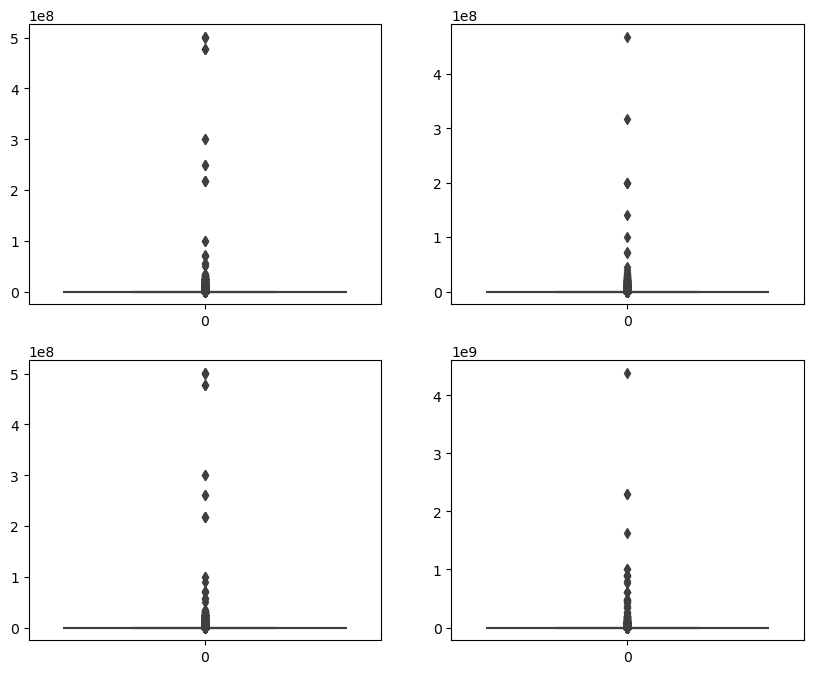

In [9]:
#**
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

sns.boxplot(df_cleaned['assistAmountAwarded'], ax=axes[0,0])
sns.boxplot(df_cleaned['amountDisbursed'], ax=axes[0,1])
sns.boxplot(df_cleaned['totalNYCInv'], ax=axes[1,0])
sns.boxplot(df_cleaned['totalPubPriInv'], ax=axes[1,1])


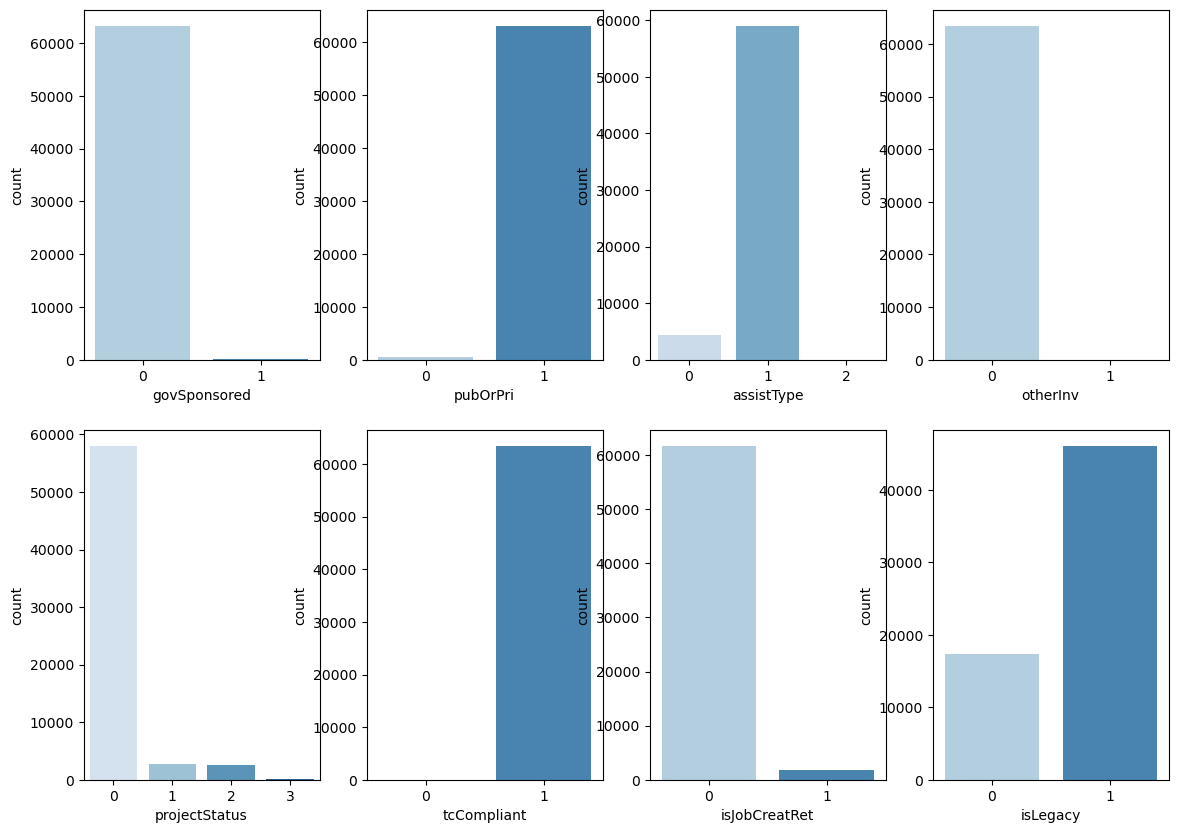

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(14, 10))
axes = axes.flatten()

binaryColumns = ["govSponsored", "pubOrPri", "assistType", "otherInv", 
                   "projectStatus", "tcCompliant", "isJobCreatRet", "isLegacy"]

for i, col in enumerate(binaryColumns):
    sns.countplot(x=df_cleaned[col], ax=axes[i], palette="Blues")
    